In [91]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# pd.set_option('max_columns', 100)

In [92]:
# loading the house prices data 
house_price_eda = pd.read_csv(r"D:\Data_Science\SecondCapstoneProjectDS\New folder\my_data.csv")

In [93]:
house_price_eda.head()

,Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Amount_in_Crore,BHK,Carpet_Area_sqft
0,9646.0,kolkata,740 sqft,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,NaN,0.012,2.0,740.0
1,4062.0,bangalore,1050 sqft,Ready to Move,4 out of 4,Resale,Semi-Furnished,East,NaN,NaN,2.0,2.0,NaN,NaN,NaN,0.650,2.0,1050.0
2,4900.0,dehradun,0,Ready to Move,1 out of 3,Resale,Semi-Furnished,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2000 sqft,0.980,3.0,0.0
3,9646.0,kolkata,740 sqft,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,NaN,0.012,2.0,740.0
4,2700.0,raipur,1300 sqft,Ready to Move,1 out of 8,New Property,Unfurnished,East,Main Road,Dolphin Jewel O,3.0,2.0,1 Covered,Co-operative Society,NaN,0.444,3.0,1300.0


In [94]:
house_price_eda.dtypes

Price (in rupees)    float64
location              object
Carpet Area           object
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
overlooking           object
Society               object
Bathroom             float64
Balcony              float64
Car Parking           object
Ownership             object
Super Area            object
Amount_in_Crore      float64
BHK                  float64
Carpet_Area_sqft     float64
dtype: object

In [95]:
house_price_eda.drop(['Carpet Area'], axis=1, inplace=True)

In [96]:
house_price_eda.columns

Index(['Price (in rupees)', 'location', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Super Area', 'Amount_in_Crore', 'BHK',
       'Carpet_Area_sqft'],
      dtype='object')

In [97]:
df = house_price_eda

In [98]:
df['Super Area'].unique()

array([nan, '2000 sqft', '1435 sqft', ..., '587 sqft', '1062 sqft',
       '40,000 sqft'], dtype=object)

In [99]:
df['Super Area'].value_counts()

Super Area
1100 sqft      494
1332 sqft      455
1500 sqft      428
500 sqft       348
1000 sqft      247
              ... 
1133 sqft        1
1637 sqft        1
119 sqm          1
637 sqft         1
40,000 sqft      1
Name: count, Length: 1586, dtype: int64

In [100]:
df['Super Area'].dtype

dtype('O')

In [101]:
df['Super Area (sqft)'] = df['Super Area'].astype(str).apply(lambda x: x.split()[0] if x != 'nan' else None)

In [102]:
df['Super Area (sqft)'].unique()

array([None, '2000', '1435', ..., '587', '1062', '40,000'], dtype=object)

In [103]:
df.columns

Index(['Price (in rupees)', 'location', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Super Area', 'Amount_in_Crore', 'BHK',
       'Carpet_Area_sqft', 'Super Area (sqft)'],
      dtype='object')

In [104]:
df=df.drop('Super Area', axis=1)

In [105]:
df.columns

Index(['Price (in rupees)', 'location', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Amount_in_Crore', 'BHK',
       'Carpet_Area_sqft', 'Super Area (sqft)'],
      dtype='object')

In [106]:
df.shape

(35602, 17)

In [107]:
df.head(5)

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
0,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.012,2.0,740.0,None
1,4062.0,bangalore,Ready to Move,4 out of 4,Resale,Semi-Furnished,East,NaN,NaN,2.0,2.0,NaN,NaN,0.650,2.0,1050.0,None
2,4900.0,dehradun,Ready to Move,1 out of 3,Resale,Semi-Furnished,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.980,3.0,0.0,2000
3,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.012,2.0,740.0,None
4,2700.0,raipur,Ready to Move,1 out of 8,New Property,Unfurnished,East,Main Road,Dolphin Jewel O,3.0,2.0,1 Covered,Co-operative Society,0.444,3.0,1300.0,None


In [108]:
df.duplicated()

0        False
1        False
2        False
3         True
4        False
         ...  
35597     True
35598     True
35599    False
35600    False
35601     True
Length: 35602, dtype: bool

In [109]:
#locating the duplicates in our dataframe 
df.loc[df.duplicated()]

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
3,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.0120,2.0,740.0,None
34,4889.0,new-delhi,Ready to Move,1 out of 2,Resale,Unfurnished,North,Main Road,NaN,1.0,1.0,NaN,Freehold,0.2200,2.0,450.0,None
61,10930.0,new-delhi,Ready to Move,6 out of 8,Resale,Semi-Furnished,North - East,"Garden/Park, Main Road",Harmony Apartment,4.0,3.0,"1 Covered,",Freehold,0.0235,3.0,1760.0,None
66,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.0120,2.0,740.0,None
68,11167.0,new-delhi,Ready to Move,8 out of 10,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Hamdam Apartment,3.0,4.0,"1 Covered,",Freehold,0.0268,4.0,2100.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35594,7500.0,bangalore,Ready to Move,7 out of 32,Resale,Unfurnished,East,Garden/Park,NaN,2.0,1.0,1 Covered,Freehold,0.8630,2.0,1000.0,None
35596,5425.0,gurgaon,Ready to Move,12 out of 12,New Property,Unfurnished,East,Garden/Park,Laxmi Apartments,1.0,2.0,NaN,Co-operative Society,0.3000,2.0,600.0,None
35597,4521.0,kolkata,Ready to Move,1 out of 3,Resale,Furnished,North - East,Main Road,NaN,2.0,1.0,1 Covered,Freehold,0.4200,2.0,745.0,None
35598,7895.0,new-delhi,Ready to Move,1 out of 4,Resale,Semi-Furnished,East,Main Road,Aadarsh Apartment,2.0,2.0,2 Open,Freehold,0.7500,2.0,850.0,None


In [110]:
df.duplicated(subset = ['location'])

0        False
1        False
2        False
3         True
4        False
         ...  
35597     True
35598     True
35599     True
35600     True
35601     True
Length: 35602, dtype: bool

In [111]:
#checking for a specific column
df.loc[df.duplicated(subset=['location'])]

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
3,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.012,2.0,740.0,None
5,7666.0,kolkata,Ready to Move,12 out of 20,Resale,Semi-Furnished,East,Main Road,Diamond City South,2.0,2.0,1 Open,Freehold,0.011,3.0,0.0,1435
7,3877.0,bangalore,Ready to Move,3 out of 6,Resale,Semi-Furnished,East,NaN,NaN,3.0,3.0,"1 Covered,",Freehold,0.630,3.0,1435.0,None
13,3243.0,pune,Ready to Move,1 out of 5,Resale,Unfurnished,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.180,1.0,0.0,555
18,3647.0,ahmedabad,Ready to Move,5 out of 14,Resale,Unfurnished,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.640,3.0,0.0,1755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,4521.0,kolkata,Ready to Move,1 out of 3,Resale,Furnished,North - East,Main Road,NaN,2.0,1.0,1 Covered,Freehold,0.420,2.0,745.0,None
35598,7895.0,new-delhi,Ready to Move,1 out of 4,Resale,Semi-Furnished,East,Main Road,Aadarsh Apartment,2.0,2.0,2 Open,Freehold,0.750,2.0,850.0,None
35599,5000.0,varanasi,Ready to Move,Lower Basement out of 1,Resale,Furnished,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.020,1.0,0.0,4000
35600,5000.0,jaipur,Ready to Move,1 out of 3,Resale,Semi-Furnished,South - East,NaN,NaN,3.0,2.0,NaN,NaN,0.012,4.0,1950.0,None


In [112]:
df['location'].nunique()

81

In [113]:
df = df.rename(columns={"Car Parking": "Car_Parking"})

In [114]:
df.query('Car_Parking == "1 Covered"')

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
0,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.0120,2.0,740.0,None
3,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.0120,2.0,740.0,None
4,2700.0,raipur,Ready to Move,1 out of 8,New Property,Unfurnished,East,Main Road,Dolphin Jewel O,3.0,2.0,1 Covered,Co-operative Society,0.4440,3.0,1300.0,None
6,2341.0,bhiwadi,Ready to Move,10 out of 13,Resale,Unfurnished,North - East,Garden/Park,Krish Aura,2.0,4.0,1 Covered,Freehold,0.2400,2.0,0.0,1025
15,7143.0,gurgaon,Ready to Move,4 out of 4,New Property,Semi-Furnished,North - East,Garden/Park,Signature Global City 37D,3.0,3.0,1 Covered,Freehold,0.0105,3.0,1470.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35590,5227.0,jaipur,Ready to Move,1 out of 6,New Property,Semi-Furnished,West,Main Road,NaN,4.0,4.0,1 Covered,Freehold,0.0115,4.0,2050.0,None
35591,4173.0,greater-noida,Ready to Move,12 out of 24,New Property,Unfurnished,East,"Garden/Park, Pool, Main Road",Nirala Estate Phase 2,2.0,4.0,1 Covered,Co-operative Society,0.5300,3.0,761.0,None
35592,2659.0,jaipur,Ready to Move,4 out of 12,New Property,Unfurnished,East,Garden/Park,Vatika Jaipur 21,3.0,3.0,1 Covered,Freehold,0.4890,3.0,0.0,1840
35594,7500.0,bangalore,Ready to Move,7 out of 32,Resale,Unfurnished,East,Garden/Park,NaN,2.0,1.0,1 Covered,Freehold,0.8630,2.0,1000.0,None


In [115]:
df.query('location == "kolkata"')

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
0,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.0120,2.0,740.0,None
3,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.0120,2.0,740.0,None
5,7666.0,kolkata,Ready to Move,12 out of 20,Resale,Semi-Furnished,East,Main Road,Diamond City South,2.0,2.0,1 Open,Freehold,0.0110,3.0,0.0,1435
19,2976.0,kolkata,Ready to Move,4 out of 5,New Property,Unfurnished,North - East,Garden/Park,NaN,1.0,1.0,NaN,Freehold,0.1830,2.0,0.0,615
42,4521.0,kolkata,Ready to Move,1 out of 3,Resale,Furnished,North - East,Main Road,NaN,2.0,1.0,1 Covered,Freehold,0.4200,2.0,745.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35565,15249.0,kolkata,Ready to Move,10 out of 19,Resale,Unfurnished,South,Pool,Onex Privy,3.0,1.0,NaN,Freehold,0.0260,3.0,0.0,1705
35571,14000.0,kolkata,Ready to Move,1 out of 1,Resale,Unfurnished,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.7000,1.0,0.0,500
35583,9503.0,kolkata,Ready to Move,2 out of 3,New Property,Unfurnished,North - East,Main Road,Gajraj Galaxy,2.0,1.0,1 Covered,Freehold,0.0111,2.0,0.0,1176
35597,4521.0,kolkata,Ready to Move,1 out of 3,Resale,Furnished,North - East,Main Road,NaN,2.0,1.0,1 Covered,Freehold,0.4200,2.0,745.0,None


In [116]:
#removing the duplicate rows
df = df.loc[~df.duplicated(subset=['location', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', \
                                   'Balcony',	'Car_Parking',	'Ownership', 'Amount_in_Crore',	'BHK',	'Carpet_Area_sqft', 'Super Area (sqft)'])]\
.reset_index(drop=True).copy()

In [117]:
df.shape

(13731, 17)

In [118]:
#checking the duplicated again
df.loc[df.duplicated()].sum()

Price (in rupees)    0.0
location               0
Status                 0
Floor                  0
Transaction            0
Furnishing             0
facing                 0
overlooking            0
Society                0
Bathroom             0.0
Balcony              0.0
Car_Parking            0
Ownership              0
Amount_in_Crore      0.0
BHK                  0.0
Carpet_Area_sqft     0.0
Super Area (sqft)      0
dtype: object

In [119]:
df.head()

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
0,9646.0,kolkata,Ready to Move,NaN,New Property,Unfurnished,NaN,Main Road,One Rajarhat,2.0,NaN,1 Covered,Freehold,0.012,2.0,740.0,None
1,4062.0,bangalore,Ready to Move,4 out of 4,Resale,Semi-Furnished,East,NaN,NaN,2.0,2.0,NaN,NaN,0.650,2.0,1050.0,None
2,4900.0,dehradun,Ready to Move,1 out of 3,Resale,Semi-Furnished,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.980,3.0,0.0,2000
3,2700.0,raipur,Ready to Move,1 out of 8,New Property,Unfurnished,East,Main Road,Dolphin Jewel O,3.0,2.0,1 Covered,Co-operative Society,0.444,3.0,1300.0,None
4,7666.0,kolkata,Ready to Move,12 out of 20,Resale,Semi-Furnished,East,Main Road,Diamond City South,2.0,2.0,1 Open,Freehold,0.011,3.0,0.0,1435


In [120]:
df['Price (in rupees)'].value_counts()

Price (in rupees)
5000.0     180
4000.0     119
3333.0      96
6000.0      83
5500.0      62
          ... 
15773.0      1
17968.0      1
17212.0      1
2729.0       1
13766.0      1
Name: count, Length: 5653, dtype: int64

<Axes: title={'center': 'Top 10 prices of house'}, xlabel='Price (in rupees)'>

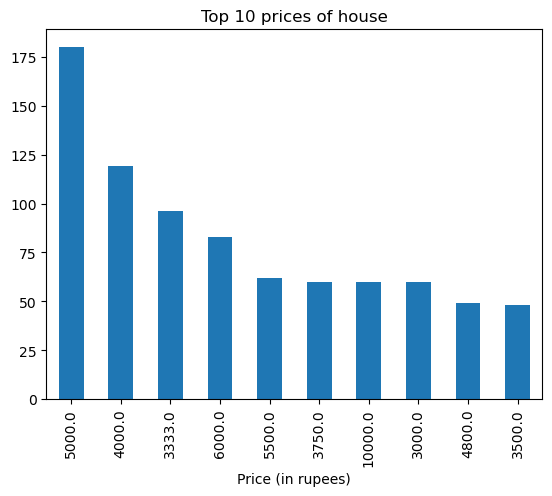

In [121]:
ax = df['Price (in rupees)'].value_counts()\
.head(10)
ax.plot(kind='bar', title = 'Top 10 prices of house')
# ax.set_xlabel("price in rupees")
# ax.set_ylabel("counts")

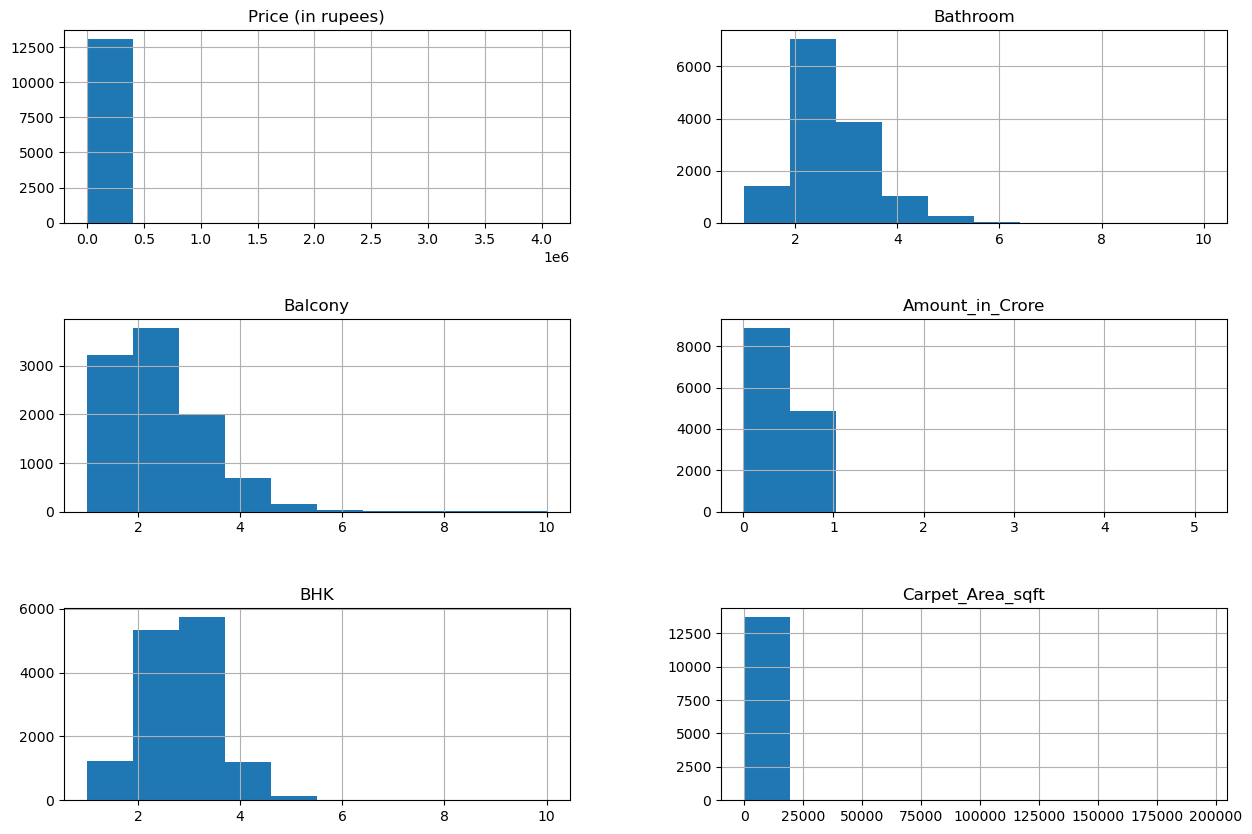

In [122]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

In [123]:
df['Price (in rupees)'].describe()

count    1.303600e+04
mean     6.886817e+03
std      3.574695e+04
min      0.000000e+00
25%      3.846000e+03
50%      5.143000e+03
75%      7.333000e+03
max      4.041600e+06
Name: Price (in rupees), dtype: float64

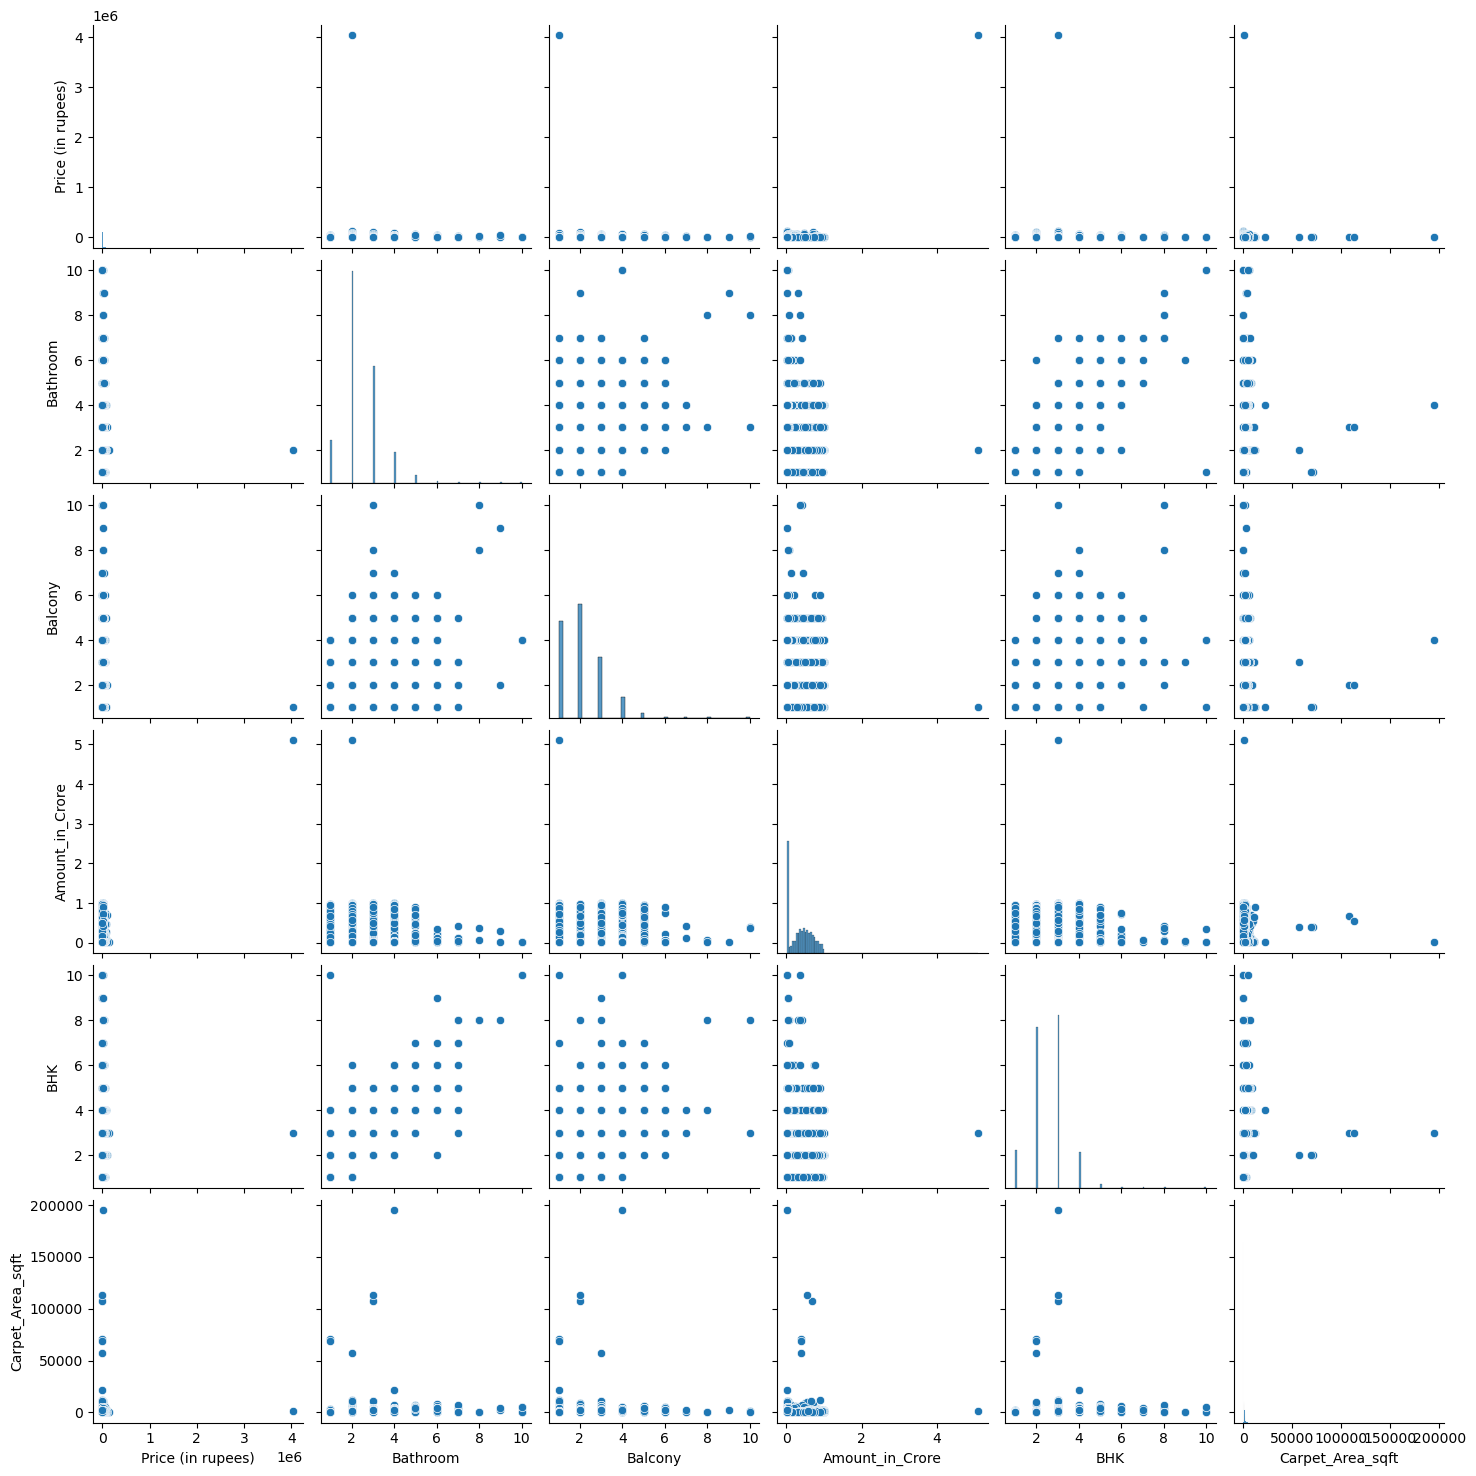

In [124]:
sns.pairplot(df)

<Axes: >

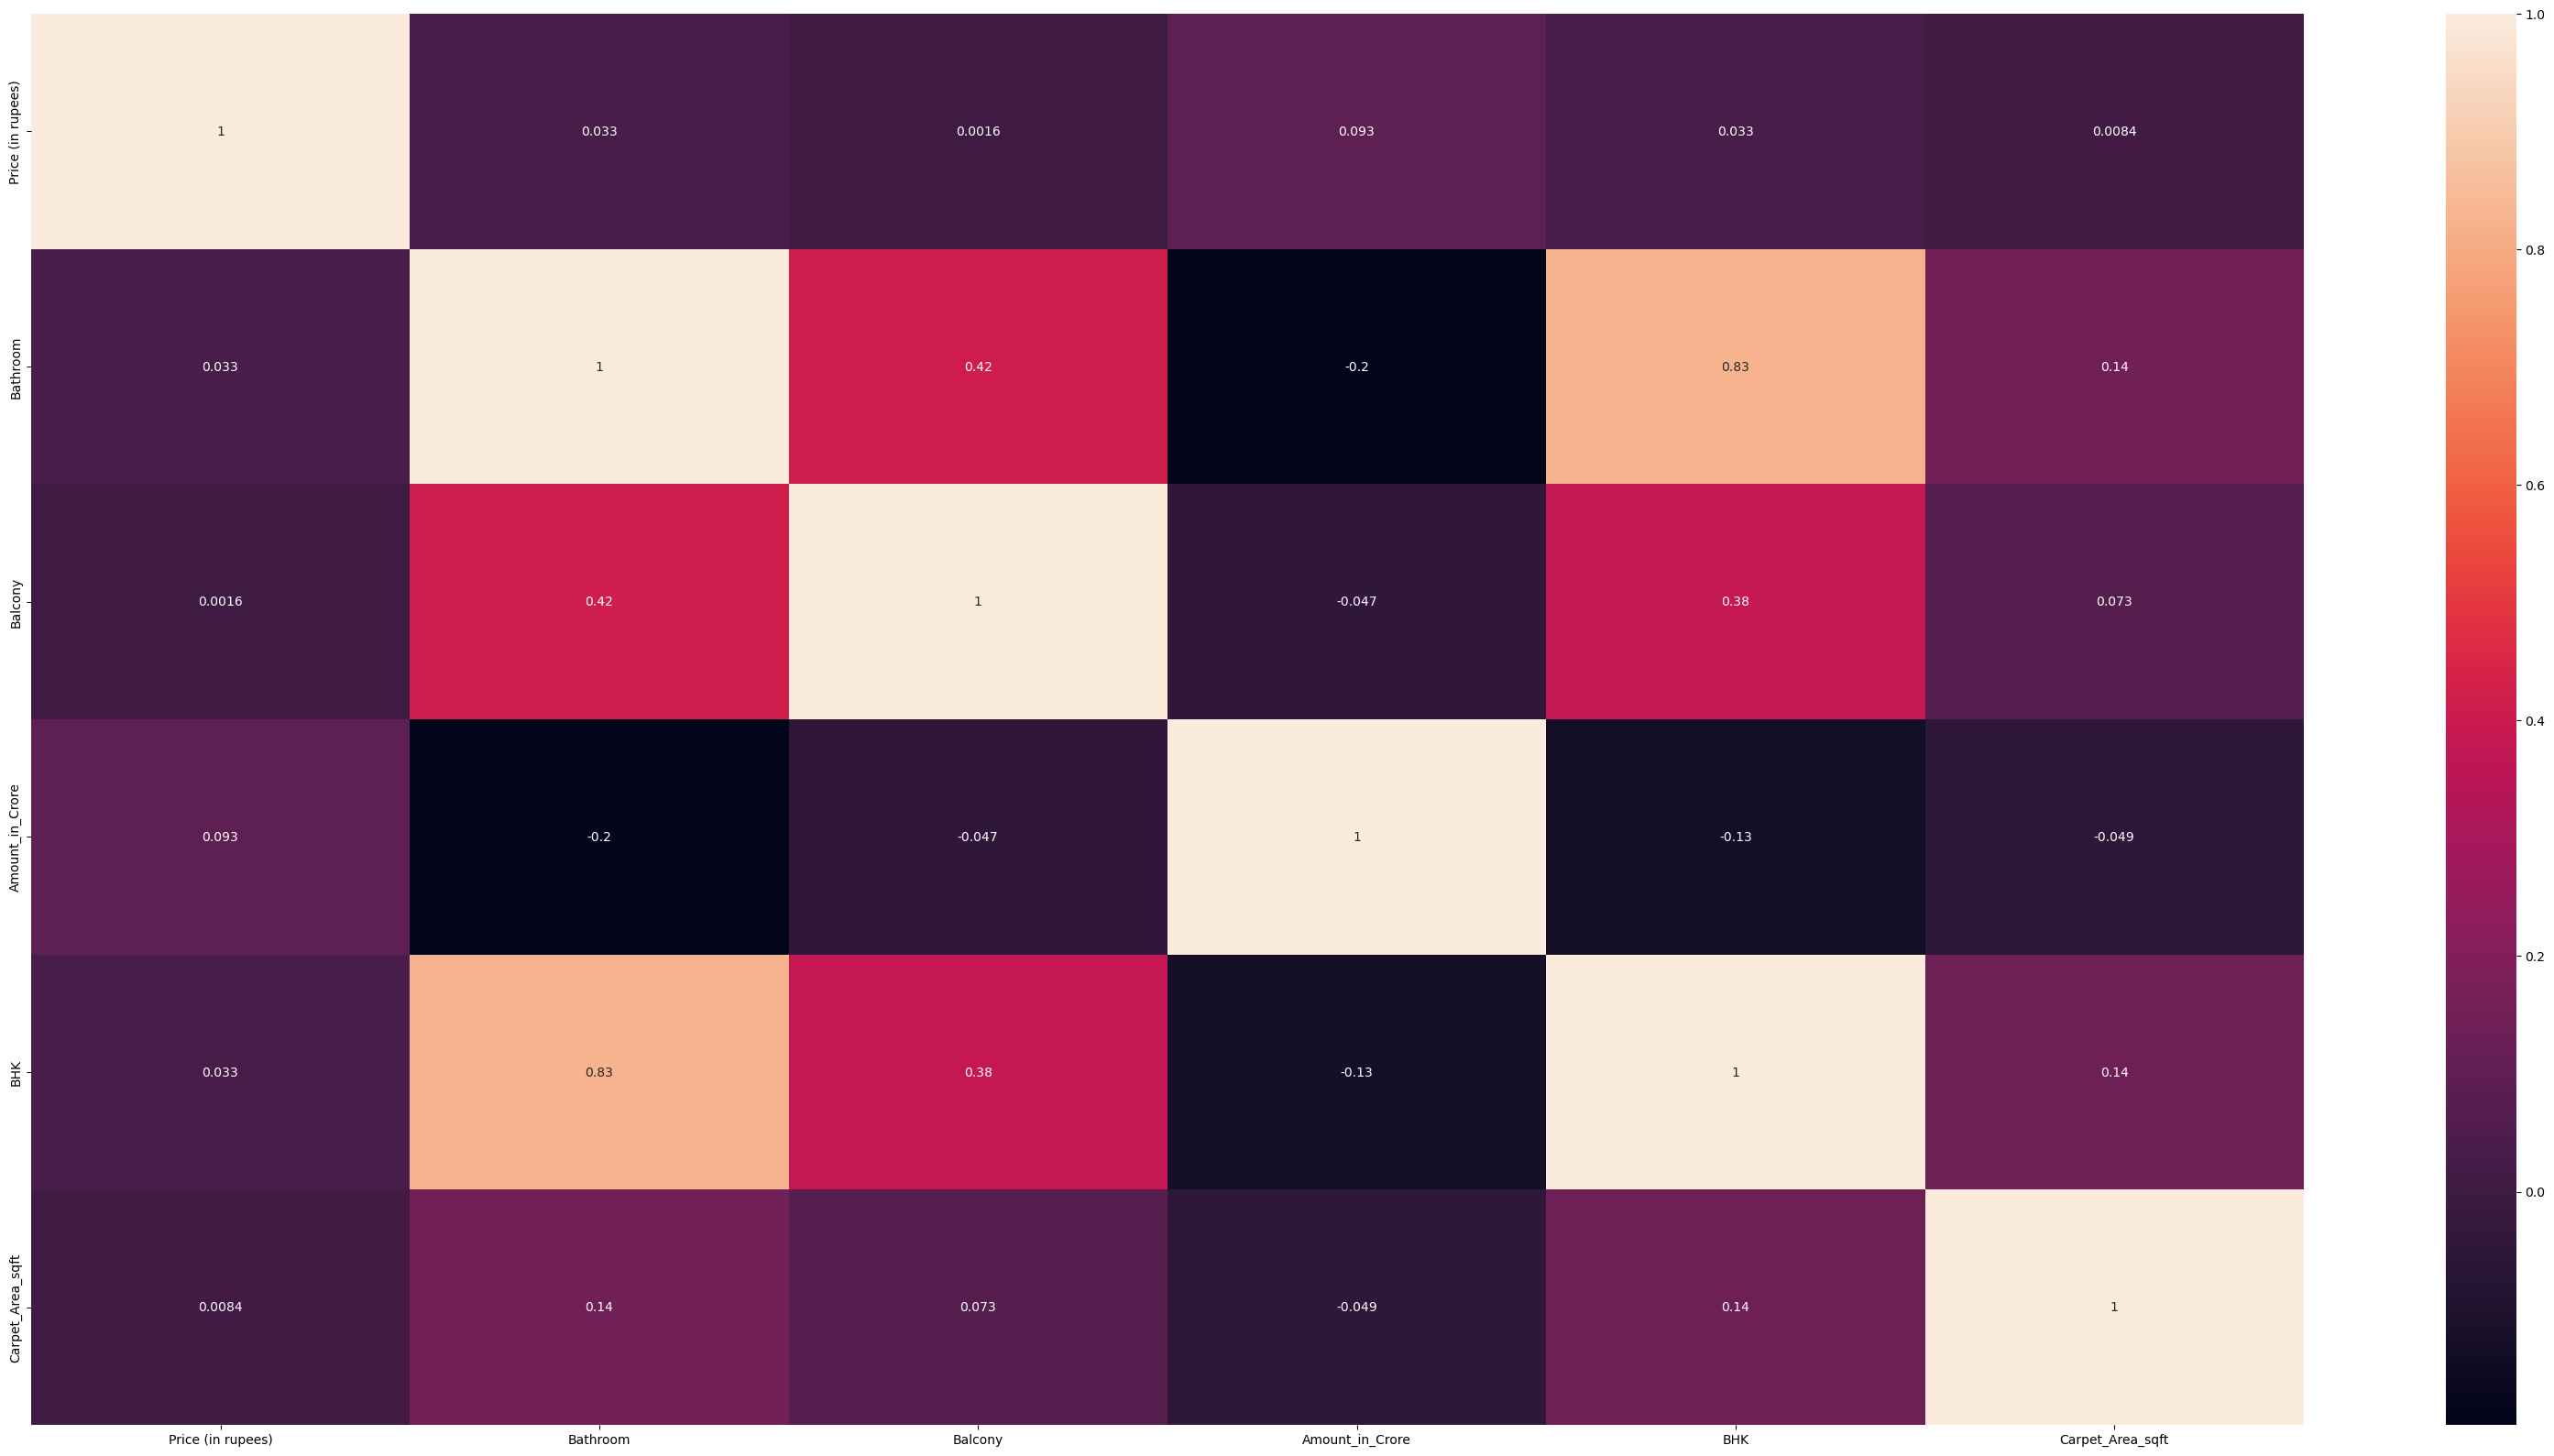

In [125]:
selected_columns = ['Price (in rupees)', 'Bathroom', 'Balcony', 'Amount_in_Crore', 'BHK', 'Carpet_Area_sqft']
df_selected = df[selected_columns]
plt.figure(figsize=(40,20))
sns.heatmap(df_selected.corr(), annot=True)

In [126]:
df.isna().sum()

Price (in rupees)     695
location                0
Status                 66
Floor                 519
Transaction            14
Furnishing            247
facing               5309
overlooking          5860
Society              7784
Bathroom               88
Balcony              3872
Car_Parking          7925
Ownership            4971
Amount_in_Crore         0
BHK                    66
Carpet_Area_sqft        0
Super Area (sqft)    7778
dtype: int64

In [127]:
# find outlier in numeric column
## replace missing values
### apply groupby on different features

In [128]:
#imputing missing values of price in rupees by median because the data is skewed 
median_price_in_rupees = df['Price (in rupees)'].median()
df['Price (in rupees)'].fillna(median_price_in_rupees, inplace=True)
# median_col1 = df['col1'].median()
# df['col1'].fillna(median_col1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4092\929316212.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price (in rupees)'].fillna(median_price_in_rupees, inplace=True)


In [129]:
df.isna().sum()

Price (in rupees)       0
location                0
Status                 66
Floor                 519
Transaction            14
Furnishing            247
facing               5309
overlooking          5860
Society              7784
Bathroom               88
Balcony              3872
Car_Parking          7925
Ownership            4971
Amount_in_Crore         0
BHK                    66
Carpet_Area_sqft        0
Super Area (sqft)    7778
dtype: int64

In [130]:
# Status (66), Transaction (14), Bathroom (88), BHK (66) → Low missingness (<100)
df['Status'].fillna(df['Status'].mode()[0], inplace=True)
df['Transaction'].fillna(df['Transaction'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['BHK'].fillna(df['BHK'].mode()[0], inplace=True)
df['Floor'].fillna(df['Floor'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Balcony'].fillna(df['Balcony'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4092\458085297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Status'].fillna(df['Status'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4092\458085297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [131]:
df.isna().sum()

Price (in rupees)       0
location                0
Status                  0
Floor                   0
Transaction             0
Furnishing              0
facing               5309
overlooking          5860
Society              7784
Bathroom                0
Balcony                 0
Car_Parking          7925
Ownership            4971
Amount_in_Crore         0
BHK                     0
Carpet_Area_sqft        0
Super Area (sqft)    7778
dtype: int64

In [132]:
df['facing'].fillna("Unknown", inplace=True)
df['overlooking'].fillna("Unknown", inplace=True)
df['Society'].fillna("Unknown", inplace=True)
df['Car_Parking'].fillna("Not Specified", inplace=True)
df['Ownership'].fillna("Unknown", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4092\528785806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna("Unknown", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4092\528785806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [133]:
df['Super Area (sqft)'] = pd.to_numeric(df['Super Area (sqft)'], errors='coerce')
df.dtypes

Price (in rupees)    float64
location              object
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
overlooking           object
Society               object
Bathroom             float64
Balcony              float64
Car_Parking           object
Ownership             object
Amount_in_Crore      float64
BHK                  float64
Carpet_Area_sqft     float64
Super Area (sqft)    float64
dtype: object

In [134]:
df['Super Area (sqft)'].fillna(df['Super Area (sqft)'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4092\3833120396.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Super Area (sqft)'].fillna(df['Super Area (sqft)'].mean(), inplace=True)


In [135]:
df.isna().sum()

Price (in rupees)    0
location             0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car_Parking          0
Ownership            0
Amount_in_Crore      0
BHK                  0
Carpet_Area_sqft     0
Super Area (sqft)    0
dtype: int64

In [136]:
df.groupby('location')[['Price (in rupees)', 'Carpet_Area_sqft']].mean()

,Price (in rupees),Carpet_Area_sqft
location,,
agra,4044.804878,1960.378049
ahmadnagar,5527.750000,300.000000
ahmedabad,5390.418212,658.440135
allahabad,10175.625000,727.225000
aurangabad,4927.420000,316.170000
...,...,...
varanasi,5133.557692,540.692308
vijayawada,4170.067227,678.033613
visakhapatnam,4870.641509,786.855346


In [137]:
df.groupby(['location', 'BHK'])[['Price (in rupees)', 'Carpet_Area_sqft']].mean()

Price (in rupees)  Carpet_Area_sqft
location BHK                                     
agra     1.0        2111.000000          0.000000
         2.0        3654.562500        434.062500
         3.0        4428.119048       3365.023810
         4.0        3405.000000       1106.000000
         5.0        7500.000000          0.000000
...                         ...               ...
zirakpur 1.0        4028.166667        182.500000
         2.0        3919.590909        707.068182
         3.0        4050.687805        923.429268
         4.0        5129.111111        957.888889
         5.0        4535.500000       2014.750000

[355 rows x 2 columns]

In [138]:
df.groupby('Society')['Carpet_Area_sqft'].sum().sort_values(ascending=False)

Society
Unknown                  5128587.0
TARC Maceo                196636.0
Aparna Prem               113134.0
Seven Heaven Jaipur       107806.0
Amrut Siddhi               57267.0
                           ...    
Saakaar Aqua City              0.0
Heliconia                      0.0
SS The Leaf                    0.0
Heritage Floors Villa          0.0
Millennium Apartments          0.0
Name: Carpet_Area_sqft, Length: 3754, dtype: float64

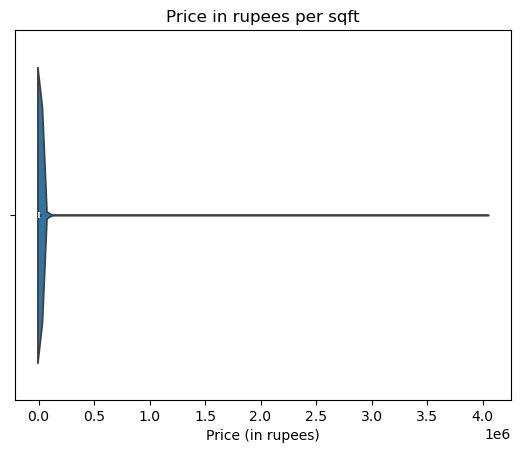

In [139]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(df['Price (in rupees)'], kde=True)
# plt.show()
sns.violinplot(x=df['Price (in rupees)'])
plt.title("Price in rupees per sqft")
plt.show()

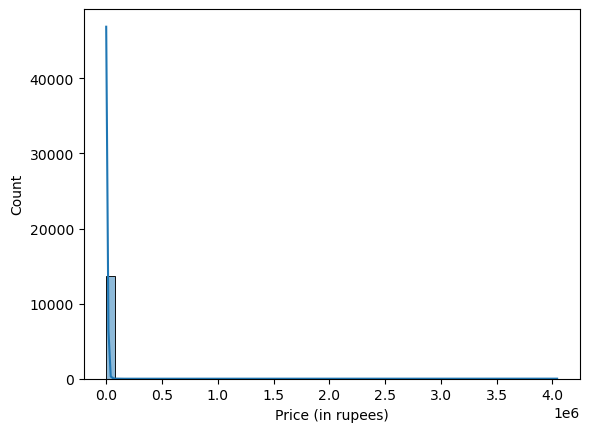

In [140]:
sns.histplot(df['Price (in rupees)'], kde=True, bins=50)
plt.show()

In [141]:
df.groupby('location')[['Price (in rupees)', 'Carpet_Area_sqft']].mean()

,Price (in rupees),Carpet_Area_sqft
location,,
agra,4044.804878,1960.378049
ahmadnagar,5527.750000,300.000000
ahmedabad,5390.418212,658.440135
allahabad,10175.625000,727.225000
aurangabad,4927.420000,316.170000
...,...,...
varanasi,5133.557692,540.692308
vijayawada,4170.067227,678.033613
visakhapatnam,4870.641509,786.855346


In [142]:
df[['Price (in rupees)', 'Carpet_Area_sqft']].corr()

,Price (in rupees),Carpet_Area_sqft
Price (in rupees),1.000000,0.008029
Carpet_Area_sqft,0.008029,1.000000


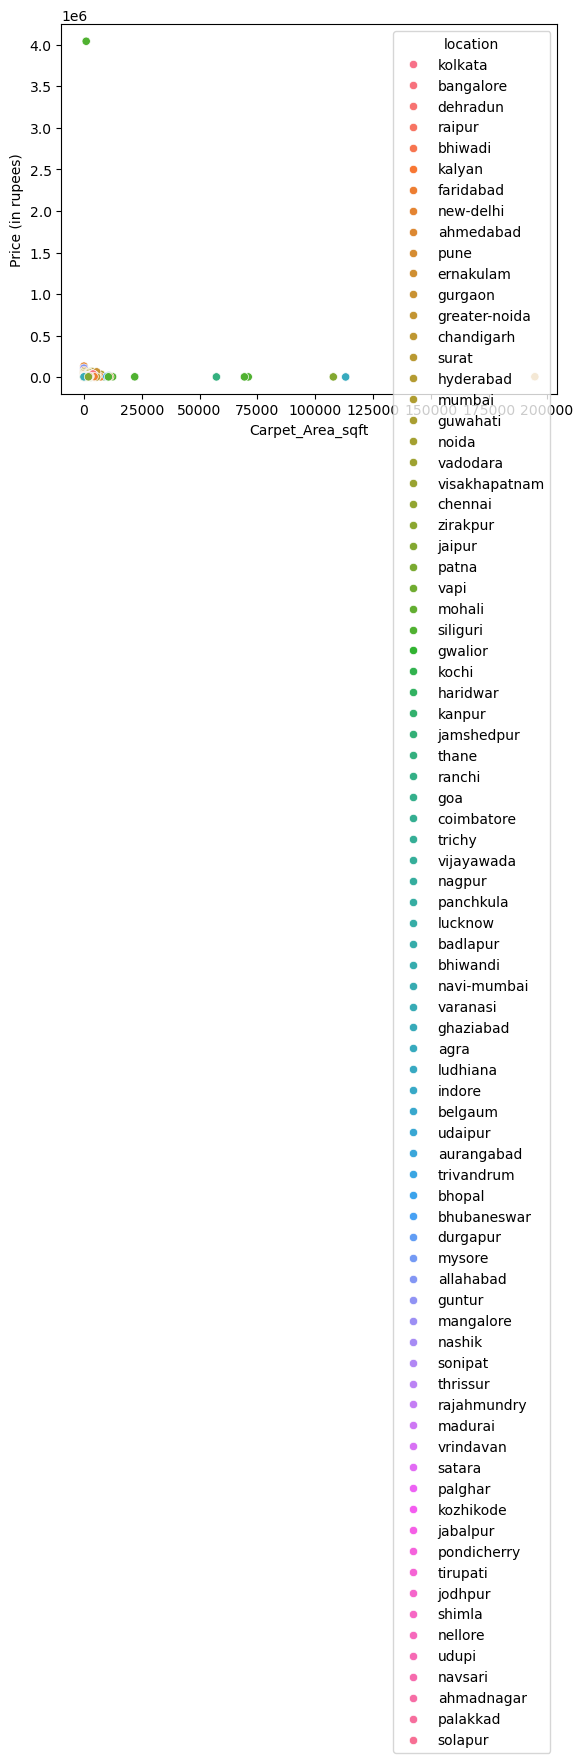

In [143]:
sns.scatterplot(data=df, x='Carpet_Area_sqft', y='Price (in rupees)', hue='location')
plt.show()

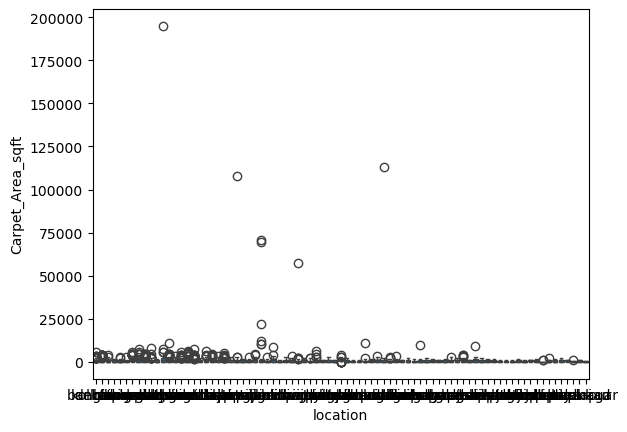

In [144]:
sns.boxplot(data=df, x='location', y='Carpet_Area_sqft')
plt.show()

In [145]:
# Group by location and calculate average price per sqft
location_prices = df.groupby('location')['Price (in rupees)'].mean().reset_index()

# Count the number of records for each location
location_counts = df['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']

# Merge the average prices and counts
location_analysis = pd.merge(location_prices, location_counts, on='location')

# Filter out locations with greater than 100 records for a more accurate representation
location_analysis = location_analysis[location_analysis['count'] > 100]

# Sort by average price
location_analysis = location_analysis.sort_values('Price (in rupees)', ascending=False)

location_analysis

,location,Price (in rupees),count
43,mumbai,21107.526946,334
50,new-delhi,13186.461409,596
23,gurgaon,10556.441176,578
67,thane,9897.877841,352
47,navi-mumbai,9870.430894,123
6,bangalore,7543.185124,605
20,goa,7315.716157,229
13,chennai,7306.112853,638
57,pune,7302.212670,442
27,hyderabad,7159.643581,592


In [146]:
# Group by location and calculate average carpet area per sqft
location_area = df.groupby('location')['Carpet_Area_sqft'].mean().reset_index()

# Count the number of records for each location
location_counts = df['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']

# Merge the average carpet area per sqft and counts
location_analysis = pd.merge(location_area, location_counts, on='location')

# Filter out locations with greater than 500 records for a more accurate representation
location_analysis = location_analysis[location_analysis['count'] > 500]

# Sort by average carpet area per sqft
location_analysis = location_analysis.sort_values('Carpet_Area_sqft', ascending=False)

location_analysis

,location,Carpet_Area_sqft,count
23,gurgaon,1651.671280,578
18,faridabad,1212.155340,618
50,new-delhi,987.248322,596
30,jaipur,705.463248,585
21,greater-noida,704.878472,576
27,hyderabad,692.538851,592
2,ahmedabad,658.440135,593
6,bangalore,564.004959,605
13,chennai,548.874608,638
36,kolkata,474.898477,591


In [147]:
df.columns

Index(['Price (in rupees)', 'location', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car_Parking', 'Ownership', 'Amount_in_Crore', 'BHK',
       'Carpet_Area_sqft', 'Super Area (sqft)'],
      dtype='object')

In [148]:
# Group by furnishing status and calculate average price per sqft
furnishing_prices = df.groupby('Furnishing')['Price (in rupees)'].mean().reset_index()
# Sort by average price
furnishing_price = furnishing_prices.sort_values('Price (in rupees)', ascending=False)
furnishing_price

,Furnishing,Price (in rupees)
2,Unfurnished,6936.022861
1,Semi-Furnished,6721.578632
0,Furnished,6620.257686


In [149]:
# Group by society and calculate average price per sqft
society_prices = df.groupby('Society')['Price (in rupees)'].mean().reset_index()

# Count the number of properties in each society
society_counts = df['Society'].value_counts().reset_index()
society_counts.columns = ['Society', 'count']

# Merge the average prices and counts
society_analysis = pd.merge(society_prices, society_counts, on='Society')

# Filter out societies with less than 100 records for a more accurate representation
society_analysis = society_analysis[society_analysis['count'] > 100]

# Sort by average price
society_analysis = society_analysis.sort_values('Price (in rupees)', ascending=False)

society_analysis

,Society,Price (in rupees),count
3511,Unknown,6788.173818,7784


In [150]:
# Group by car parking and calculate average price per sqft
Car_Parking_prices = df.groupby('Car_Parking')['Price (in rupees)'].mean().reset_index()

# Count the number of records in car parking
Car_Parking_counts = df['Car_Parking'].value_counts().reset_index()
Car_Parking_counts.columns = ['Car_Parking', 'count']

# Merge the average prices and counts
Car_Parking_analysis = pd.merge(Car_Parking_prices, Car_Parking_counts, on='Car_Parking')

# Filter out societies with less than 100 records for a more accurate representation
# Car_Parking_analysis = Car_Parking_analysis[Car_Parking_analysis['count'] > 100]

# Sort by average price
Car_Parking_analysis = Car_Parking_analysis.sort_values('Price (in rupees)', ascending=False)

Car_Parking_analysis

,Car_Parking,Price (in rupees),count
17,123 Covered,25000.000000,1
53,"4 Covered,",24520.272727,11
72,"6 Covered,",19284.666667,3
49,323 Covered,16667.000000,1
41,3 Covered,16484.945946,74
...,...,...,...
29,"20 Covered,",2690.000000,1
80,8 Open,2667.000000,1
19,13 Covered,2411.000000,1
30,200 Open,2069.000000,1


In [151]:
df['Car_Parking'].unique()

array(['1 Covered', 'Not Specified', '1 Open', '1 Covered,', '4 Covered,',
       '2 Covered', '2 Covered,', '2 Open', '10 Open', '34 Covered',
       '3 Covered', '3 Covered,', '23 Open', '303 Open', '90 Covered,',
       '234 Covered', '211 Covered', '300 Open', '601 Covered',
       '4 Covered', '402 Covered', '45 Open', '5 Covered', '12 Covered',
       '100 Open', '4 Open', '8 Covered', '256 Covered', '509 Covered,',
       '20 Covered,', '6 Covered', '50 Open', '100 Covered',
       '111 Covered', '653 Open', '16 Covered', '6 Covered,', '8 Open',
       '500 Open', '180 Covered', '5 Open', '301 Covered', '5 Covered,',
       '10 Covered', '3 Open', '123 Covered', '103 Open', '112 Covered',
       '202 Covered', '101 Covered', '14 Open', '502 Covered',
       '25 Covered', '7 Covered', '203 Covered', '7 Covered,',
       '108 Covered', '45 Covered', '323 Covered', '103 Covered',
       '9 Covered', '151 Open', '204 Covered', '411 Covered',
       '413 Covered', '129 Open', '233 Op

In [152]:
# Group by bathroom and calculate average price
Bathroom_prices = df.groupby('Bathroom')['Price (in rupees)'].mean().reset_index()

# Count the number of records for each bathroom count
Bathroom_counts = df['Bathroom'].value_counts().reset_index()
Bathroom_counts.columns = ['Bathroom', 'count']

# Merge the average prices and counts
Bathroom_analysis = pd.merge(Bathroom_prices, Bathroom_counts, on='Bathroom')

# Sort by average price
Bathroom_analysis = Bathroom_analysis.sort_values('Price (in rupees)', ascending=False)

Bathroom_analysis

,Bathroom,Price (in rupees),count
8,9.0,24654.500000,2
7,8.0,17266.500000,2
6,7.0,14067.333333,9
4,5.0,13577.282353,255
5,6.0,12120.400000,35
3,4.0,9190.584236,1015
2,3.0,6946.777978,3878
1,2.0,6339.103046,7123
0,1.0,5548.946023,1408
9,10.0,4917.500000,4


In [153]:
# Group by balcony and calculate average price per sqft
Balcony_prices = df.groupby('Balcony')['Price (in rupees)'].mean().reset_index()

# Count the number of records for balconies
Balcony_counts = df['Balcony'].value_counts().reset_index()
Balcony_counts.columns = ['Balcony', 'count']

# Merge the average prices and counts
Balcony_analysis = pd.merge(Balcony_prices, Balcony_counts, on='Balcony')

# Sort by average price
Balcony_analysis = Balcony_analysis.sort_values('Price (in rupees)', ascending=False)

Balcony_analysis

,Balcony,Price (in rupees),count
6,7.0,16059.500000,2
9,10.0,13465.500000,2
5,6.0,10335.708333,24
7,8.0,10000.000000,2
4,5.0,9995.250000,148
3,4.0,7760.724638,690
0,1.0,7479.622823,3216
2,3.0,6725.979490,1999
8,9.0,6452.000000,1
1,2.0,6366.349941,7647


In [154]:
# Group by BHK and calculate average price per sqft
BHK_prices = df.groupby('BHK')['Price (in rupees)'].mean().reset_index()

# Count the number of records for BHK's
BHK_counts = df['BHK'].value_counts().reset_index()
BHK_counts.columns = ['BHK', 'count']

# Merge the average prices and counts
BHK_analysis = pd.merge(BHK_prices, BHK_counts, on='BHK')

# Sort by average price
BHK_analysis = BHK_analysis.sort_values('Price (in rupees)', ascending=False)

BHK_analysis

,BHK,Price (in rupees),count
7,8.0,24001.200000,5
5,6.0,12802.550000,20
4,5.0,9780.548872,133
3,4.0,9777.308081,1188
2,3.0,7280.585055,5808
6,7.0,6712.500000,4
8,9.0,6126.500000,2
0,1.0,6000.529032,1240
1,2.0,5682.651089,5328
9,10.0,5353.333333,3


In [155]:
# ~[df['Price (in rupees)']> 100000]
# df_filtered = df[df['Price (in rupees)'] <= 400000]

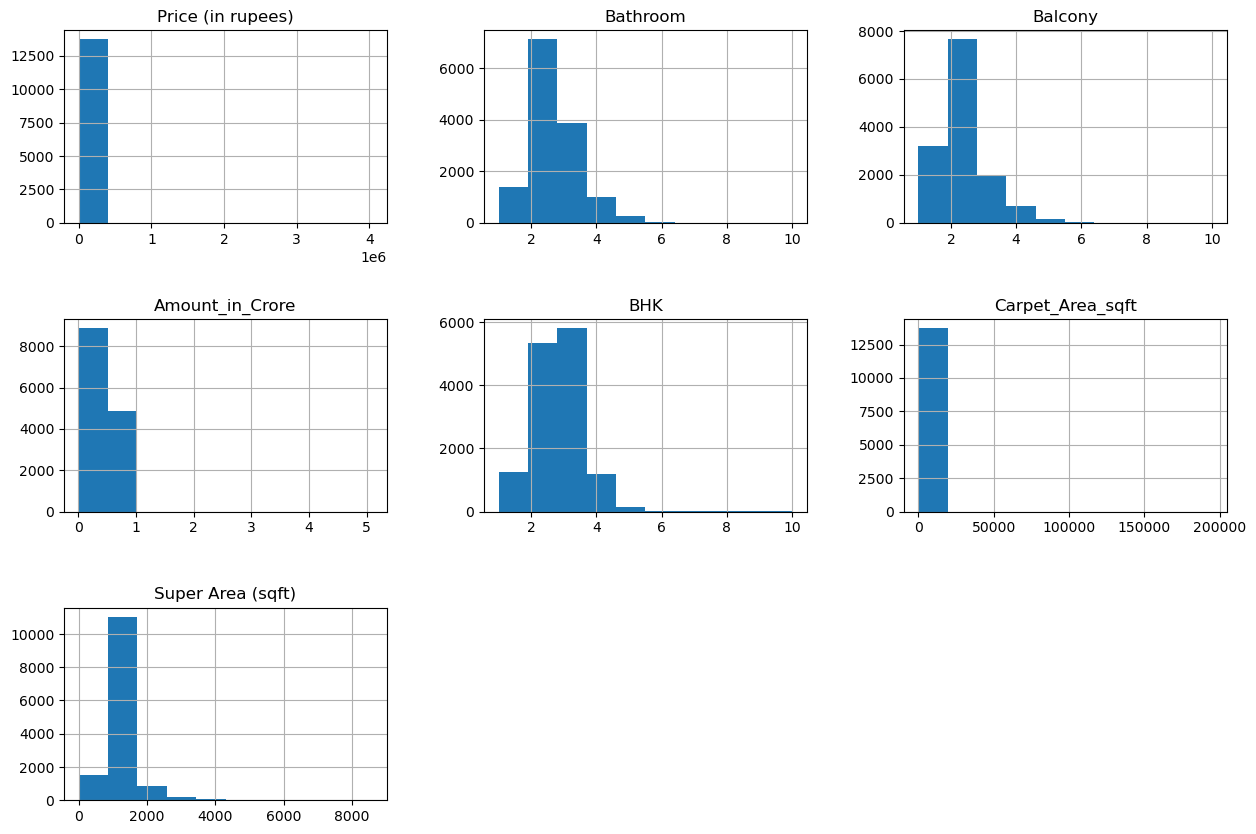

In [156]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

In [157]:
# sns.boxplot(data=df_filtered, x='location', y='Price (in rupees)', hue='Furnishing')
# plt.title('Box Plot of House Prices by Neighborhood')
# plt.xlabel('Neighborhood')
# plt.ylabel('House Price')
# plt.xticks(rotation=45)
# plt.show()

In [158]:
df[df['Carpet_Area_sqft']>70000]
# df_filtered = df[df['Carpet_Area_sqft'] <= 70000]

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
3495,4231.0,jaipur,Ready to Move,11 out of 14,Resale,Unfurnished,Unknown,Unknown,Seven Heaven Jaipur,3.0,2.0,Not Specified,Unknown,0.680,3.0,107806.0,1314.654894
5353,3500.0,agra,Ready to Move,2 out of 11,Resale,Semi-Furnished,Unknown,Unknown,Aparna Prem,3.0,2.0,1 Covered,Freehold,0.560,3.0,113134.0,1314.654894
5980,4200.0,siliguri,Ready to Move,2 out of 5,New Property,Unfurnished,East,Unknown,Unknown,1.0,1.0,"1 Covered,",Freehold,0.398,2.0,71025.0,1314.654894
12784,6131.0,gurgaon,Ready to Move,20 out of 20,New Property,Unfurnished,North - East,Garden/Park,TARC Maceo,4.0,4.0,2 Covered,Freehold,0.026,3.0,194936.0,1314.654894


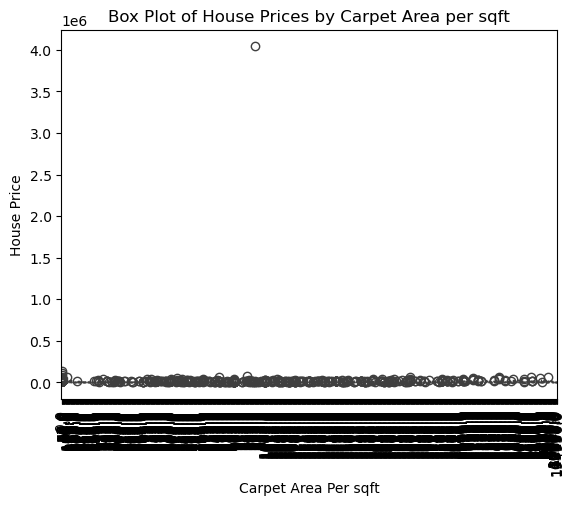

In [159]:
sns.boxplot(data=df, x='Carpet_Area_sqft', y='Price (in rupees)')
plt.title('Box Plot of House Prices by Carpet Area per sqft')
plt.xlabel('Carpet Area Per sqft')
plt.ylabel('House Price')
plt.xticks(rotation=90)
plt.show()

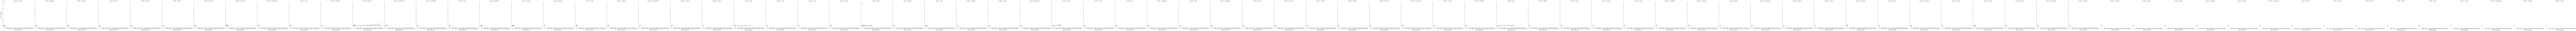

In [160]:
sns.lmplot(data=df, x='Carpet_Area_sqft', y='Price (in rupees)', col='location', fit_reg=True)
plt.show()

In [161]:
df[df['Bathroom']> 9]

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
3095,5143.0,jaipur,Ready to Move,Lower Basement out of 5,Resale,Semi-Furnished,Unknown,Unknown,Unknown,10.0,4.0,Not Specified,Unknown,0.0275,10.0,0.0,1314.654894
3240,5926.0,hyderabad,Ready to Move,3 out of 3,Resale,Unfurnished,East,Unknown,Unknown,10.0,2.0,4 Covered,Unknown,0.0320,3.0,5400.0,1314.654894
7054,4884.0,goa,Ready to Move,3 out of 3,Resale,Semi-Furnished,Unknown,Unknown,Unknown,10.0,2.0,Not Specified,Unknown,0.0210,3.0,0.0,400.000000
12332,3717.0,chennai,Ready to Move,1 out of 2,Resale,Unfurnished,East,Main Road,Unknown,10.0,4.0,4 Covered,Freehold,0.0223,10.0,5300.0,1314.654894


In [162]:
df[df['Balcony']> 8]

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
5623,6452.0,visakhapatnam,Ready to Move,2 out of 3,New Property,Furnished,East,Main Road,Unknown,9.0,9.0,2 Covered,Freehold,0.0199,3.0,2700.0,1314.654894
8677,2398.0,sonipat,Ready to Move,6 out of 13,Resale,Unfurnished,North - East,Garden/Park,Maxheights Metroview,3.0,10.0,1 Covered,Freehold,0.4100,3.0,1500.0,1314.654894
10462,24533.0,mumbai,Ready to Move,63 out of 63,Resale,Unfurnished,East,"Pool, Garden/Park, Main Road",Sunteck Signature Island,8.0,10.0,"6 Covered,",Freehold,0.3680,8.0,0.0,1314.654894


In [163]:
df[df['Amount_in_Crore']> 5]

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
10825,4041600.0,siliguri,Ready to Move,1 out of 4,New Property,Unfurnished,North,Main Road,Unknown,2.0,1.0,1 Covered,Freehold,5.1004,3.0,970.0,1314.654894


In [164]:
df[df['BHK']> 8]

,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
2725,3750.0,bangalore,Ready to Move,Upper Basement out of 5,Resale,Semi-Furnished,Unknown,Unknown,Unknown,2.0,2.0,Not Specified,Unknown,0.0300,9.0,0.0,8000.000000
3095,5143.0,jaipur,Ready to Move,Lower Basement out of 5,Resale,Semi-Furnished,Unknown,Unknown,Unknown,10.0,4.0,Not Specified,Unknown,0.0275,10.0,0.0,1314.654894
5950,8503.0,chennai,Ready to Move,1 out of 3,New Property,Semi-Furnished,East,Unknown,Unknown,6.0,3.0,Not Specified,Freehold,0.0375,9.0,0.0,4410.000000
9312,7200.0,bhopal,Ready to Move,2 out of 4,New Property,Furnished,Unknown,Unknown,Unknown,1.0,1.0,Not Specified,Unknown,0.3600,10.0,0.0,500.000000
12332,3717.0,chennai,Ready to Move,1 out of 2,Resale,Unfurnished,East,Main Road,Unknown,10.0,4.0,4 Covered,Freehold,0.0223,10.0,5300.0,1314.654894


In [165]:
# df[df['Carpet_Area_sqft']> 100000]

In [170]:
# removing outliers
def remove_outliers(df, column, lower=0.01, upper=0.99):
    low=df[column].quantile(lower)
    high=df[column].quantile(upper)
    return df[(df[column]>=low) & (df[column]<=high)]

df=remove_outliers(df, 'Price (in rupees)')
df=remove_outliers(df, 'Carpet_Area_sqft')
df=remove_outliers(df, 'Amount_in_Crore')

In [175]:
def df_filtered(df, column, value):
    return df[df[column]<=value]
    
df = df_filtered(df, 'Balcony', 8)
df = df_filtered(df, 'Bathroom', 8)
df = df_filtered(df, 'BHK', 8)

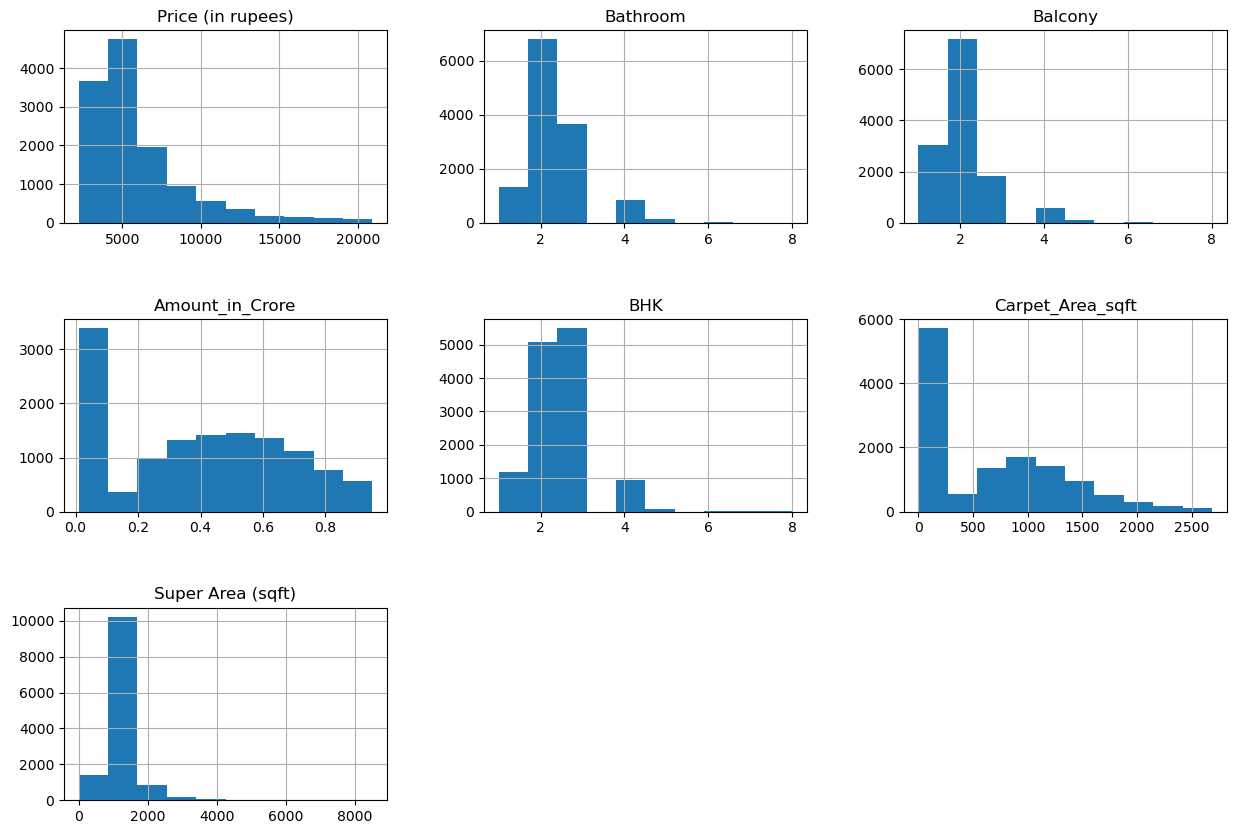

In [177]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)